In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [68]:
df = pd.read_excel('insurance (2).xlsx')

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [73]:
df = pd.get_dummies(df,drop_first='True',dtype=int)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [74]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_male,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_yes,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region_northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
region_southwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


# Data Visualization

<Figure size 1200x1200 with 0 Axes>

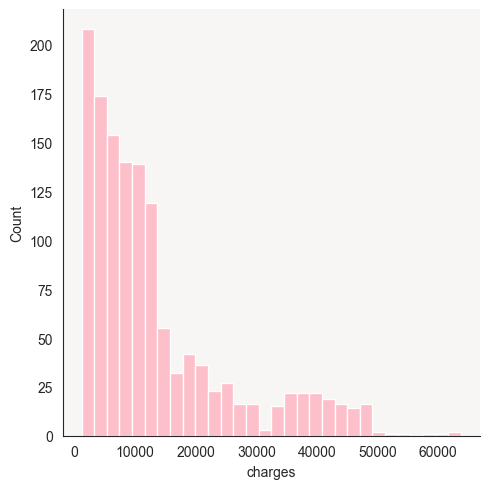

In [76]:
plt.figure(figsize=(12,12))
sns.displot(df['charges'])

<Axes: >

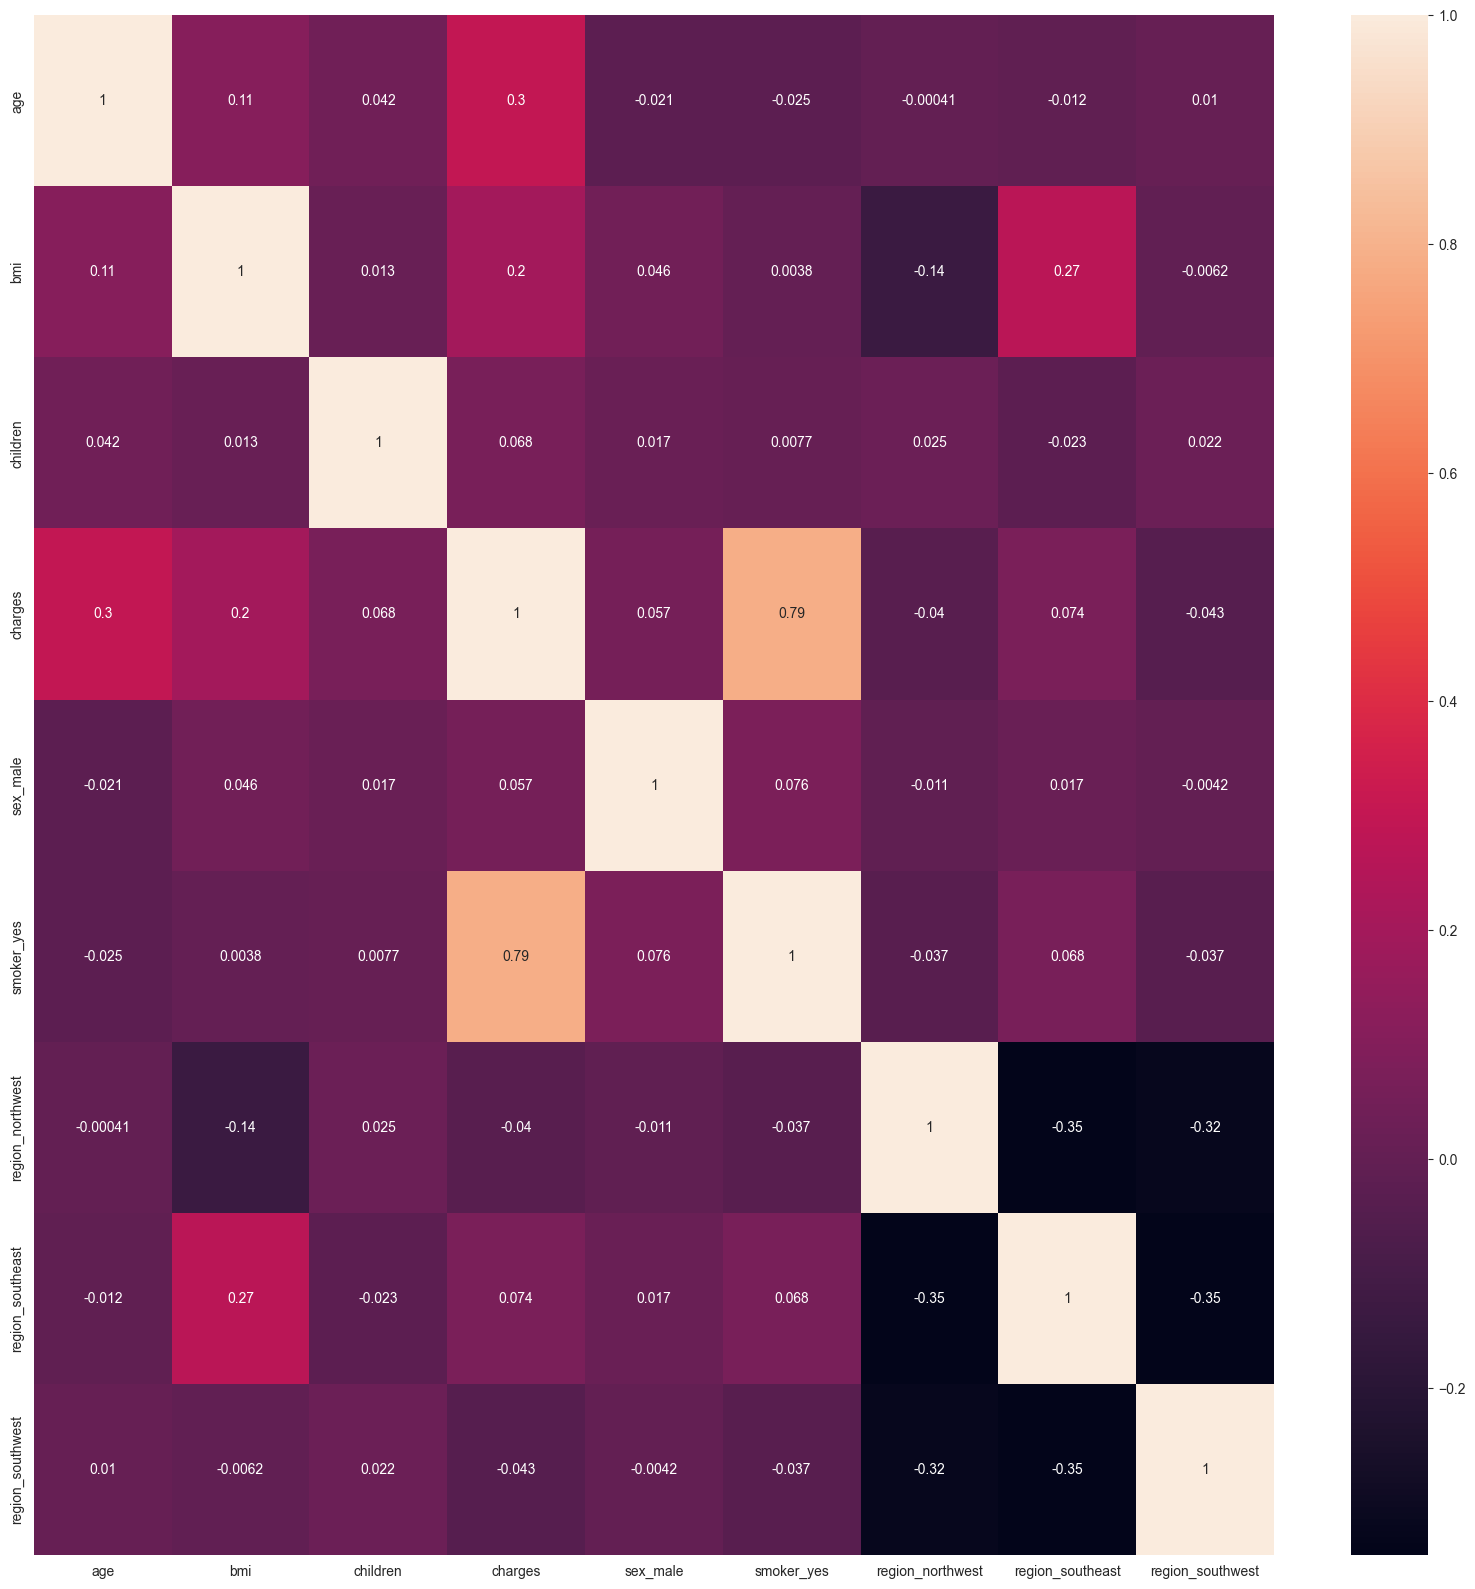

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [78]:
x = df.drop('charges',axis=1)
y = df['charges']

In [79]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=78)

In [80]:
xtrain.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
62,64,24.700,1,1,0,1,0,0
861,38,28.000,3,0,0,0,0,1
973,19,40.500,0,0,0,0,0,1
209,40,41.230,1,1,0,0,0,0
849,55,32.775,0,1,0,1,0,0


In [81]:
ytrain.head()

62     30166.61817
861     7151.09200
973     1759.33800
209     6610.10970
849    10601.63225
Name: charges, dtype: float64

In [82]:
xtest.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
160,42,26.600,0,0,1,1,0,0
1326,42,32.870,0,0,0,0,0,0
544,54,30.210,0,1,0,1,0,0
624,59,28.785,0,1,0,1,0,0
914,33,24.605,2,1,0,1,0,0


In [83]:
ytest.head()

160     21348.70600
1326     7050.02130
544     10231.49990
624     12129.61415
914      5257.50795
Name: charges, dtype: float64

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [85]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [86]:
pred = reg.predict(xtest)
pred

array([31788.12415848, 10057.96458416, 11805.03363936, 12637.16558129,
        5292.34917699, 14937.24332716,  6843.39686348,  9844.12164329,
       31546.28166286, 35661.51797566,  7773.03338302, 10252.68880356,
        3291.76172714,  9968.51244299, 36056.63733713,  5874.23846911,
        7129.47275069, 30702.2219255 , 29414.02280598, 34548.9748491 ,
       15146.98382939, 11468.99809806,  4125.41490797,  1651.05053958,
        8984.36417671, 31248.27592736, 30178.16117905,  2865.91668553,
       10556.9330032 , 29865.08250737,  3126.96238342,  8093.14474276,
        3139.61910949, 15266.45548663, 31142.2884418 , 10683.36847776,
        3188.994659  , 11771.38934137,   652.20966932, 13908.46390176,
         238.89418158,  8758.71194274,  9473.50060147, 27779.0160558 ,
       13359.84823646,  6271.67912619,  7434.77881185, 14015.63227642,
        2764.56028867, 25589.57779194,  5017.09011276,  4031.48547975,
        9288.00303645,  8489.1968969 ,  -757.31022628,  7294.40519   ,
      

In [87]:
df_pred = pd.DataFrame({'Actual': ytest, 'Prediction': pred, 'Difference': abs(ytest-pred)})
df_pred.head()

,Actual,Prediction,Difference
160,21348.70600,31788.124158,10439.418158
1326,7050.02130,10057.964584,3007.943284
544,10231.49990,11805.033639,1573.533739
624,12129.61415,12637.165581,507.551431
914,5257.50795,5292.349177,34.841227


In [88]:
m = reg.coef_
m

array([  263.60071923,   340.96256438,   467.01290744,    52.28169748,
       24429.45570481,  -561.46085183, -1176.11151097, -1198.77559809])

In [89]:
c = reg.intercept_
c

-12220.705114824694

In [90]:
reg.score(xtest,ytest)

0.7217992168302145

In [91]:
MLR_accuracy = reg.score(xtest,ytest)
print("MLR Accuracy:", MLR_accuracy)

MLR Accuracy: 0.7217992168302145


In [92]:
MLR_mae = mean_absolute_error(ytest,pred)
print("MLR MAE:", MLR_mae)

MLR MAE: 4177.439054814994


In [93]:
MLR_mse = mean_squared_error(ytest,pred)
print("MLR MSE:", MLR_mse)

MLR MSE: 36147477.90373667


In [94]:
metrics = pd.DataFrame({'Metric': ['MLR Accuracy', 'MLR MSE', 'MLR MAE'],
                       'Value': [MLR_accuracy, MLR_mse, MLR_mae]})

df_after_pred = pd.DataFrame(data=metrics)

In [95]:
df_after_pred.head()

,Metric,Value
0,MLR Accuracy,7.217992e-01
1,MLR MSE,3.614748e+07
2,MLR MAE,4.177439e+03


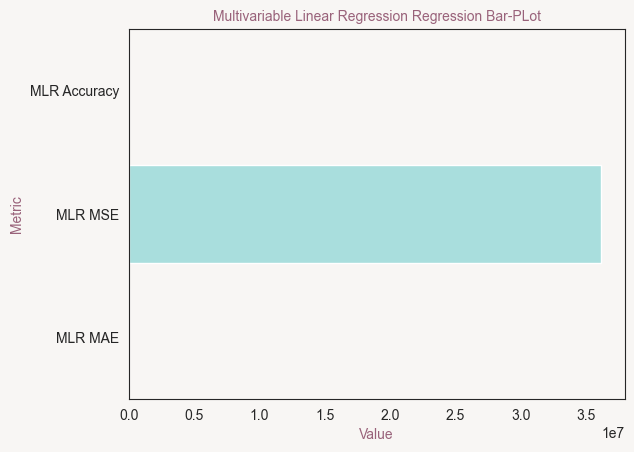

In [96]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Value', y='Metric', data=df_after_pred)

plt.title("Multivariable Linear Regression Regression Bar-PLot", color="#99627A", fontsize=10)
ax.set_xlabel('Value', color='#99627A', fontsize=10)
ax.set_ylabel('Metric', color='#99627A', fontsize=10)

plt.show()